In [1]:
# Auto formatting
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import scipy as sp
from IPython.display import display
from sklearn.model_selection import train_test_split
import time
import plotly.express as px
import plotly.graph_objects as go

<IPython.core.display.Javascript object>

In [35]:
df = pd.read_csv("../data/cleaned.csv", index_col=[0])
display(df)

,loan_amount,term,income,Credit_Score,Status,loan_limit_cf,loan_limit_ncf,submission_of_application_not_inst,submission_of_application_to_inst,co-applicant_credit_type_CIB,...,Region_North-East,Region_central,Region_south,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,116500,360.0,1740.0,758,1,1,0,0,1,1,...,0,0,1,1,0,0,0,0,0,0
1,206500,360.0,4980.0,552,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,406500,360.0,9480.0,834,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
3,456500,360.0,11880.0,587,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
4,696500,360.0,10440.0,602,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135103,436500,180.0,7860.0,659,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
135104,586500,360.0,7140.0,569,0,1,0,1,0,1,...,0,0,1,1,0,0,0,0,0,0
135105,446500,180.0,6900.0,702,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
135106,196500,180.0,7140.0,737,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


<IPython.core.display.Javascript object>

In [36]:
X = df.drop("Credit_Score", axis=1)
y = df.loc[:, "Credit_Score"]
display(y)
display(X)

0         758
1         552
2         834
3         587
4         602
         ... 
135103    659
135104    569
135105    702
135106    737
135107    830
Name: Credit_Score, Length: 135108, dtype: int64

,loan_amount,term,income,Status,loan_limit_cf,loan_limit_ncf,submission_of_application_not_inst,submission_of_application_to_inst,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,...,Region_North-East,Region_central,Region_south,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,116500,360.0,1740.0,1,1,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,0
1,206500,360.0,4980.0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,406500,360.0,9480.0,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
3,456500,360.0,11880.0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,696500,360.0,10440.0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135103,436500,180.0,7860.0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
135104,586500,360.0,7140.0,0,1,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,0
135105,446500,180.0,6900.0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
135106,196500,180.0,7140.0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


<IPython.core.display.Javascript object>

In [5]:
def standardizeData(data):
    # Takes pandas dataframe and standardizes it iteratively
    for column in data:
        if (data[column] != 0).sum() == 0:  # If the column is all zeros
            continue  # No need to standardize all zeros (thus dividing by zero)
        else:
            data[column] = (data[column] - np.mean(data[column])) / np.std(data[column])
    return data

<IPython.core.display.Javascript object>

TowardsDataScience: If one of your variables happens to be on a very small scale, its coefficient will be large, and as such, it will be much more punished due to the penalisation. Or vice versa, a variable that is on a huge scale will get small coefficients and be less impacted by the penalty. 

In [37]:
X_standardized = df
X_standardized = standardizeData(X_standardized)
display(X_standardized)
display(X)

,loan_amount,term,income,Credit_Score,Status,loan_limit_cf,loan_limit_ncf,submission_of_application_not_inst,submission_of_application_to_inst,co-applicant_credit_type_CIB,...,Region_North-East,Region_central,Region_south,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,-1.152094,0.439777,-0.803694,0.502618,1.716802,0.268036,-0.268036,-0.737362,0.737362,0.995436,...,-0.091551,-0.246226,1.152530,2.614658,-0.531420,-0.553124,-0.533515,-0.402305,-0.096048,-0.224268
1,-0.665241,0.439777,-0.305114,-1.275460,1.716802,0.268036,-0.268036,-0.737362,0.737362,-1.004585,...,-0.091551,-0.246226,-0.867657,-0.382459,-0.531420,-0.553124,1.874361,-0.402305,-0.096048,-0.224268
2,0.416656,0.439777,0.387358,1.158608,-0.582478,0.268036,-0.268036,-0.737362,0.737362,0.995436,...,-0.091551,-0.246226,1.152530,-0.382459,1.881751,-0.553124,-0.533515,-0.402305,-0.096048,-0.224268
3,0.687130,0.439777,0.756677,-0.973360,-0.582478,0.268036,-0.268036,1.356185,-1.356185,0.995436,...,-0.091551,-0.246226,-0.867657,-0.382459,-0.531420,1.807912,-0.533515,-0.402305,-0.096048,-0.224268
4,1.985407,0.439777,0.535086,-0.843888,-0.582478,0.268036,-0.268036,1.356185,-1.356185,-1.004585,...,-0.091551,-0.246226,-0.867657,2.614658,-0.531420,-0.553124,-0.533515,-0.402305,-0.096048,-0.224268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135103,0.578941,-2.568908,0.138068,-0.351895,-0.582478,0.268036,-0.268036,-0.737362,0.737362,-1.004585,...,-0.091551,-0.246226,1.152530,-0.382459,-0.531420,-0.553124,1.874361,-0.402305,-0.096048,-0.224268
135104,1.390363,0.439777,0.027273,-1.128726,-0.582478,0.268036,-0.268036,1.356185,-1.356185,0.995436,...,-0.091551,-0.246226,1.152530,2.614658,-0.531420,-0.553124,-0.533515,-0.402305,-0.096048,-0.224268
135105,0.633036,-2.568908,-0.009659,0.019257,-0.582478,0.268036,-0.268036,1.356185,-1.356185,-1.004585,...,-0.091551,-0.246226,-0.867657,-0.382459,-0.531420,1.807912,-0.533515,-0.402305,-0.096048,-0.224268
135106,-0.719336,-2.568908,0.027273,0.321358,-0.582478,0.268036,-0.268036,-0.737362,0.737362,-1.004585,...,-0.091551,-0.246226,-0.867657,-0.382459,-0.531420,-0.553124,1.874361,-0.402305,-0.096048,-0.224268


,loan_amount,term,income,Status,loan_limit_cf,loan_limit_ncf,submission_of_application_not_inst,submission_of_application_to_inst,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,...,Region_North-East,Region_central,Region_south,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,116500,360.0,1740.0,1,1,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,0
1,206500,360.0,4980.0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,406500,360.0,9480.0,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
3,456500,360.0,11880.0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,696500,360.0,10440.0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135103,436500,180.0,7860.0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
135104,586500,360.0,7140.0,0,1,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,0
135105,446500,180.0,6900.0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
135106,196500,180.0,7140.0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


<IPython.core.display.Javascript object>

In [40]:
# Lets not standardize dummy variables
# THIS FIXES ALL THE PROBLEMS :)
X_standNotDumb = standardizeData(X.iloc[:, :3])
Xnewstand = X

display(X_standNotDumb)
display(Xnewstand)
Xnewstand[["loan_amount", "term", "income"]] = X_standNotDumb[
    ["loan_amount", "term", "income"]
]
display(Xnewstand)

,loan_amount,term,income
0,-1.152094,0.439777,-0.803694
1,-0.665241,0.439777,-0.305114
2,0.416656,0.439777,0.387358
3,0.687130,0.439777,0.756677
4,1.985407,0.439777,0.535086
...,...,...,...
135103,0.578941,-2.568908,0.138068
135104,1.390363,0.439777,0.027273
135105,0.633036,-2.568908,-0.009659
135106,-0.719336,-2.568908,0.027273


,loan_amount,term,income,Status,loan_limit_cf,loan_limit_ncf,submission_of_application_not_inst,submission_of_application_to_inst,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,...,Region_North-East,Region_central,Region_south,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,116500,360.0,1740.0,1,1,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,0
1,206500,360.0,4980.0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,406500,360.0,9480.0,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
3,456500,360.0,11880.0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,696500,360.0,10440.0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135103,436500,180.0,7860.0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
135104,586500,360.0,7140.0,0,1,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,0
135105,446500,180.0,6900.0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
135106,196500,180.0,7140.0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


,loan_amount,term,income,Status,loan_limit_cf,loan_limit_ncf,submission_of_application_not_inst,submission_of_application_to_inst,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,...,Region_North-East,Region_central,Region_south,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,-1.152094,0.439777,-0.803694,1,1,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,0
1,-0.665241,0.439777,-0.305114,1,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.416656,0.439777,0.387358,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
3,0.687130,0.439777,0.756677,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1.985407,0.439777,0.535086,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135103,0.578941,-2.568908,0.138068,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
135104,1.390363,0.439777,0.027273,0,1,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,0
135105,0.633036,-2.568908,-0.009659,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
135106,-0.719336,-2.568908,0.027273,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


<IPython.core.display.Javascript object>

In [41]:
# Start analysis with value of arbitrary value of lambda
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    Xnewstand, y, test_size=0.3, random_state=0
)

n, m = Xtrain.shape
I = np.identity(m)
alpha = 1e5
beta = sp.linalg.inv((Xtrain.T @ Xtrain) + alpha * I) @ Xtrain.T @ Ytrain
display(beta)

0      0.327551
1      1.382586
2      0.816499
3     11.881972
4     39.657372
        ...    
58    10.372135
59     9.324720
60     6.273951
61     0.572112
62     2.112797
Length: 63, dtype: float64

<IPython.core.display.Javascript object>

In [42]:
variables = X.columns.tolist()
model_coef = pd.DataFrame({"abs coef": abs(beta), "coef": beta, "names": variables})
display(
    model_coef[model_coef["abs coef"] != 0].sort_values(by="abs coef", ascending=False)
)

,abs coef,coef,names
15,44.549106,44.549106,Security_Type_direct
10,44.549106,44.549106,Secured_by_home
13,44.549106,44.549106,construction_type_sb
24,44.073175,44.073175,open_credit_nopc
40,43.089548,43.089548,total_units_1U
...,...,...,...
42,0.326860,0.326860,total_units_3U
43,0.249578,0.249578,total_units_4U
12,0.047013,0.047013,construction_type_mh
14,0.047013,0.047013,Security_Type_Indriect


<IPython.core.display.Javascript object>

(-0.039, 1.039, -2.8264182786970693, 49.99022146624917)

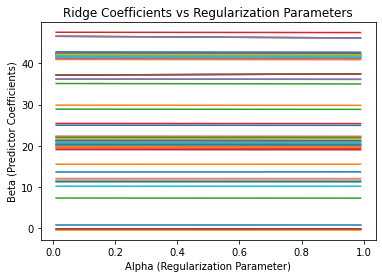

<IPython.core.display.Javascript object>

In [96]:
from sklearn.linear_model import Ridge
import scipy as sp

coef = []
# alphas = np.array(
#     [0.01, 0.5, 0.75, 0.9, 1, 10, 100, 1000, 10000, 100000, 1000000]
# )  # np.arange(0.2, 3, 0.2)
alphas = np.arange(0.01, 1, 0.01)
# print(alphas)
allData = pd.DataFrame({"alphas": alphas})

for a in alphas:
    # ridgereg = Ridge(alpha=a)
    # ridgereg.fit(Xtrain, Ytrain)
    #     print(a)
    beta = sp.linalg.inv((Xtrain.T @ Xtrain) + a * I) @ Xtrain.T @ Ytrain
    # coef.append(ridgereg.coef_)
    coef.append(beta)
    # print(coef)
    # print(beta)


## Make plot of Beta as a function of Alpha
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(alphas, coef)
ax.set_xlabel("Alpha (Regularization Parameter)")
ax.set_ylabel("Beta (Predictor Coefficients)")
ax.set_title("Ridge Coefficients vs Regularization Parameters")
ax.axis("tight")


# import plotly.graph_objects as go

# fig = go.Figure()

# fig.add_Trace(go.Scatter(x))

In [104]:
# K Fold CV
from sklearn.metrics import *

start = time.time()


def KfoldCV(X, Y, alphas, k):
    masterList = np.array([])  # what we return
    MSElist = np.array([])
    for l2 in alphas:
        for i in range(k):
            Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3,)

            n, m = Xtrain.shape
            I = np.identity(m)
            # Beta vector
            beta = sp.linalg.inv((Xtrain.T @ Xtrain) + l2 * I) @ Xtrain.T @ Ytrain

            Ypred = Xtest @ beta
            MSE = mean_squared_error(Ytest, Ypred)

            MSElist = np.append(MSElist, MSE)

        masterList = np.append(masterList, np.mean(MSElist))

    return masterList


listMSE = KfoldCV(Xnewstand.to_numpy(), y, alphas, 5)
print("--- %s seconds ---" % (time.time() - start))

--- 174.8470242023468 seconds ---


<IPython.core.display.Javascript object>

In [105]:
kfoldMSE = pd.DataFrame({"lambda": alphas, "MSE": listMSE})

minMSEindex = kfoldMSE["MSE"].idxmin()
minMSErow = kfoldMSE.iloc[minMSEindex]

fig = go.Figure(
    data=px.scatter(
        kfoldMSE,
        x="lambda",
        y="MSE",
        labels={"lambda": "Ridge Parameter", "MSE": "Mean Squared Error"},
        title="MSE with K-Fold Cross Validation w/ 30/70 Test Train Ratio",
    )
)

fig.add_trace(
    go.Scatter(
        x=[minMSErow.loc["lambda"]], y=[minMSErow.loc["MSE"]], name="Minimum MSE"
    )
)

fig.show()

# Looks like 0.21 is the best value

<IPython.core.display.Javascript object>

In [106]:
# Now with our optimized lambda of 10 million

beta = sp.linalg.inv((Xtrain.T @ Xtrain) + 0.02 * I) @ Xtrain.T @ Ytrain

Ypred = Xtest.to_numpy() @ beta
model_coef = pd.DataFrame({"coef": beta, "names": variables})
sorted_model = model_coef[model_coef["coef"] != 0].sort_values(
    by="coef", ascending=False
)
display(sorted_model.head(15))
display(sorted_model.tail(15))

,coef,names
23,47.588657,business_or_commercial_nob/c
11,46.607123,Secured_by_land
14,46.607123,Security_Type_Indriect
12,46.607123,construction_type_mh
20,42.823652,lump_sum_payment_lpsm
25,42.507882,open_credit_opc
17,42.499711,interest_only_not_int
4,42.455951,loan_limit_cf
27,42.236549,Credit_Worthiness_l2
28,42.176366,approv_in_adv_nopre


,coef,names
61,19.740089,age_<25
43,19.486306,total_units_4U
53,19.080798,Region_North-East
41,15.533987,total_units_2U
40,13.644814,total_units_1U
56,12.082402,age_25-34
58,11.723243,age_45-54
57,11.477943,age_35-44
60,11.261859,age_65-74
59,10.198157,age_55-64


<IPython.core.display.Javascript object>

In [102]:
start = time.time()


def KfoldCV(X, Y, alphas, k):
    masterList = np.array([])  # what we return
    MSElist = np.array([])
    for l2 in alphas:
        for i in range(k):
            Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.5)

            n, m = Xtrain.shape
            I = np.identity(m)
            # Beta vector
            beta = sp.linalg.inv((Xtrain.T @ Xtrain) + l2 * I) @ Xtrain.T @ Ytrain

            Ypred = Xtest @ beta
            MSE = mean_squared_error(Ytest, Ypred)

            MSElist = np.append(MSElist, MSE)

        masterList = np.append(masterList, np.mean(MSElist))

    return masterList


alphas_small = np.arange(0, 1000, 10)
listMSE_5050 = KfoldCV(Xnewstand.to_numpy(), y, alphas, 5)
print("--- %s seconds ---" % (time.time() - start))

--- 150.68269038200378 seconds ---


<IPython.core.display.Javascript object>

In [103]:
kfoldMSE_5050 = pd.DataFrame({"lambda": alphas, "MSE": listMSE_5050})

minMSEindex_5050 = kfoldMSE_5050["MSE"].idxmin()
minMSErow_5050 = kfoldMSE_5050.iloc[minMSEindex_5050]

fig_5050 = go.Figure(
    data=px.scatter(
        kfoldMSE_5050,
        x="lambda",
        y="MSE",
        labels={"lambda": "Ridge Parameter", "MSE": "Mean Squared Error"},
        title="MSE with K-Fold Cross Validation w/ 50/50 Test Train Ratio",
    )
)

fig_5050.add_trace(
    go.Scatter(
        x=[minMSErow_5050.loc["lambda"]],
        y=[minMSErow_5050.loc["MSE"]],
        name="Minimum MSE",
    )
)

fig_5050.show()

<IPython.core.display.Javascript object>

In [107]:
n, m = Xtest.shape
I = np.identity(m)
# Beta vector
beta_test = sp.linalg.inv((Xtest.T @ Xtest) + 0.21 * I) @ Xtest.T @ Ytest
Ypred = Xtest.to_numpy() @ beta_test
Y_pred_actual = pd.DataFrame({"predictions": Ypred, "actual": Ytest})
display(Y_pred_actual)

,predictions,actual
110481,699.064784,561
48198,696.693571,895
59102,702.784667,508
107644,697.477998,553
34907,698.188614,539
...,...,...
105154,695.072835,805
81171,697.968743,828
54722,700.896039,653
109435,701.616558,719


<IPython.core.display.Javascript object>

To Do:
- Fix predictions 
- Compare to Sk-Learn Ridge Regression function 
- Try out more c.v.